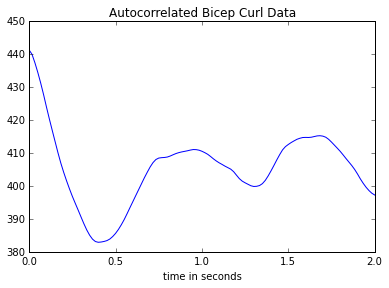

In [17]:
import matplotlib.pyplot as plt
import csv
import sys
from math import *
from matplotlib import *
import numpy

%matplotlib inline

#File name to read:
csv_reader = csv.reader(open("bicep_curl.csv"))

#Max & Min values for size of graph
bigx = float(-sys.maxint -1)
bigy = float(-sys.maxint -1)
smallx = float(sys.maxint)
smally = float(sys.maxint)

verts = []

for row in csv_reader:
    verts.append(row)
    if float (row[0]) > bigx:
        bigx = float(row[0])
        if float(row[1]) > bigy:
            bigy = float(row[1])
            if float(row[0]) < smallx:
                smallx = float(row[0])
                if float(row[1]) < smally:
                    smally = float(row[1])
                    if float(row[2]) > bigy:
                        bigy = float(row[2])

verts.sort()
x_arr = []
y_arr = []

for vert in verts:
    x_arr.append(vert[0]) #(time)
    y_arr.append(sqrt(float(vert[1])**2 + float(vert[2])**2 + float(vert[3])**2)) #(magnitude of xyz axis)

#fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#Find zero-cross line
ymax = max(y_arr)
ymin = min(y_arr)
alpha = 0.65

zero_cross = alpha * (ymax-ymin) + ymin

#Graph zero-cross line (visual)
"""horizontal_line_arr = []
i = 0
while i < len(y_arr):
    horizontal_line_arr.append(float(zero_cross))
    i += 1
    
#Zero-Crossing Detection Algorithm
step_counter = 0
i = 0
while i < len(y_arr):
    if float(y_arr[i]) > (zero_cross-0.075) and float(y_arr[i]) < (zero_cross+0.075):
        step_counter += 1
        i += 8 #add delay if step is detected
    else:
        i += 1"""
        
#ax.set_title("Step Counter: %s" % step_counter)
#ax.set_xlabel("time in seconds")
#ax.set_ylabel("accelerometer data")

#pyplot.plot(x_arr, y_arr)
#pyplot.plot(x_arr, horizontal_line_arr, color = "red")

#Save picture of graph as
#fig.savefig("walking_data_withcounts.pdf")

#Print the counter
"""print "Counter: %s" % step_counter
print "Zero-Cross Line: %s" % zero_cross

print "ymax = %s" % ymax
print "ymin = %s" % ymin"""

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
autocorr = numpy.correlate(y_arr, y_arr[0:len(y_arr)/3], 'valid')
pyplot.plot(numpy.array(range(len(autocorr)))/60.0, autocorr)
pylab.xlim([0, 2])
ax.set_title("Autocorrelated Bicep Curl Data")
ax.set_xlabel("time in seconds")
ax.set_ylabel("")

fig.savefig("autocorr_bicepcurl.pdf")